In [13]:
import sys
sys.path.append('..')
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from utils.data_utils import get_dataloader, get_data_tag
from utils.test_utils import Tester
from models.models import MLP, CNN, CNNResNet, CausalCNNResNet

rcParams['svg.fonttype'] = 'none'
rcParams['font.family'] = 'SimHei'
rcParams['axes.unicode_minus'] = False

In [42]:
data, tag = get_data_tag(faultP=[2, 3, 4], desample=512)

In [43]:
train_loader, test_loader = get_dataloader(data, tag)

Train set size: 24072
Test set size: 6018


In [53]:
cnn = CNN(
    input_channels=512, conv_layers=[(32, 1, 1, 1), (64, 1, 1, 1)], fc_layers=[128], num_classes=22)

In [54]:
test_cnn = Tester(model=cnn, epoch=20)

The device is: cuda
The tester initialization is completed.


In [55]:
test_cnn.train(train_loader=train_loader)

[INFO] EPOCH: 1/20
Train loss: 0.081619, Train accuracy: 0.2418
[INFO] EPOCH: 2/20
Train loss: 0.028488, Train accuracy: 0.8321
[INFO] EPOCH: 3/20
Train loss: 0.007977, Train accuracy: 0.9661
[INFO] EPOCH: 4/20
Train loss: 0.003773, Train accuracy: 0.9785
[INFO] EPOCH: 5/20
Train loss: 0.002609, Train accuracy: 0.9785
[INFO] EPOCH: 6/20
Train loss: 0.002041, Train accuracy: 0.9804
[INFO] EPOCH: 7/20
Train loss: 0.001794, Train accuracy: 0.9811
[INFO] EPOCH: 8/20
Train loss: 0.001574, Train accuracy: 0.9815
[INFO] EPOCH: 9/20
Train loss: 0.001483, Train accuracy: 0.9816
[INFO] EPOCH: 10/20
Train loss: 0.001343, Train accuracy: 0.9830
[INFO] EPOCH: 11/20
Train loss: 0.001282, Train accuracy: 0.9824
[INFO] EPOCH: 12/20
Train loss: 0.001232, Train accuracy: 0.9835
[INFO] EPOCH: 13/20
Train loss: 0.001201, Train accuracy: 0.9834
[INFO] EPOCH: 14/20
Train loss: 0.001109, Train accuracy: 0.9853
[INFO] EPOCH: 15/20
Train loss: 0.001114, Train accuracy: 0.9844
[INFO] EPOCH: 16/20
Train loss: 0.

In [56]:
test_cnn.test(test_loader=test_loader)
test_cnn.calculate_performance_metrice()

[INFO] Test loss: 0.000894, Test accuracy: 98.6536
[INFO] The running time is: 0.20099663734436035s



In [58]:
test_cnn.metrics

{'Accuracy': 0.9865359042553191,
 'F1-score': 0.9862846127488499,
 'Kappa': 0.9858662142812621,
 'MAE': 0.10638297872340426,
 'Precision': 0.9872812627103653,
 'Recall': 0.986192314292358,
 'Specificity': 1.0,
 'Confusion Matrix': array([[181,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0, 189,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0, 151,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0, 389,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0, 387,   0,   0,   0,   0,   1,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0, 370,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   

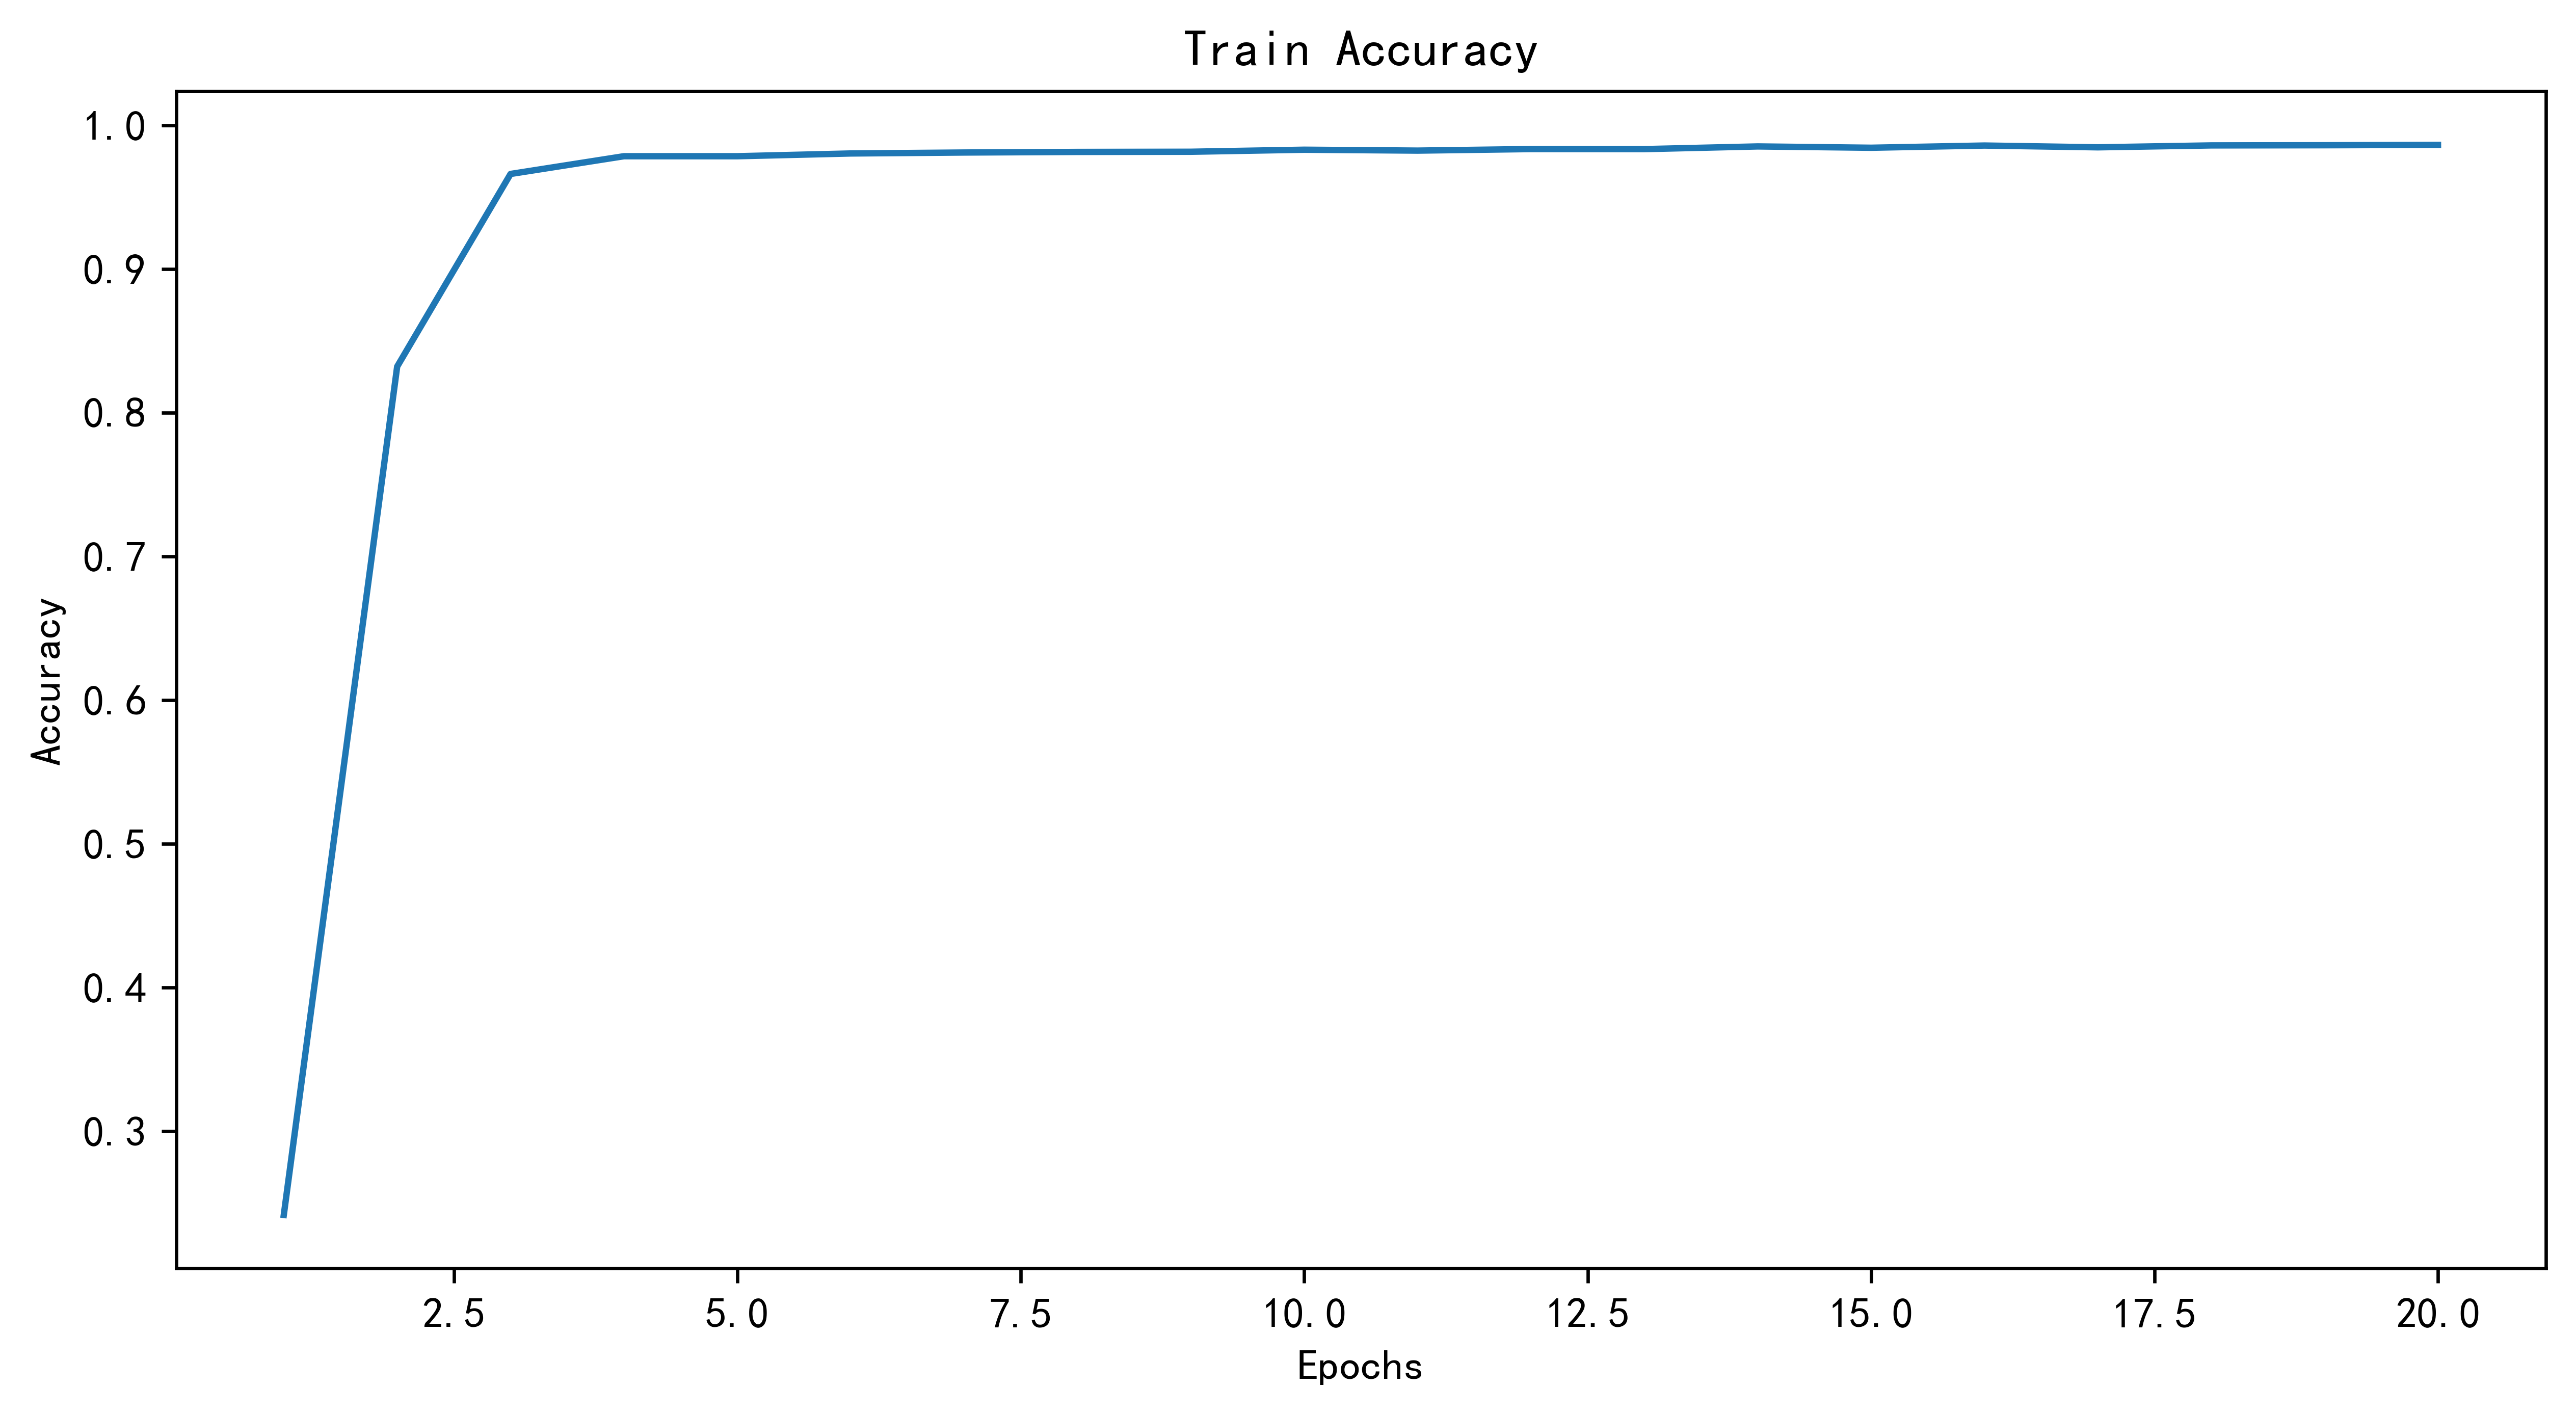

In [59]:
test_cnn.plot_accuracy()

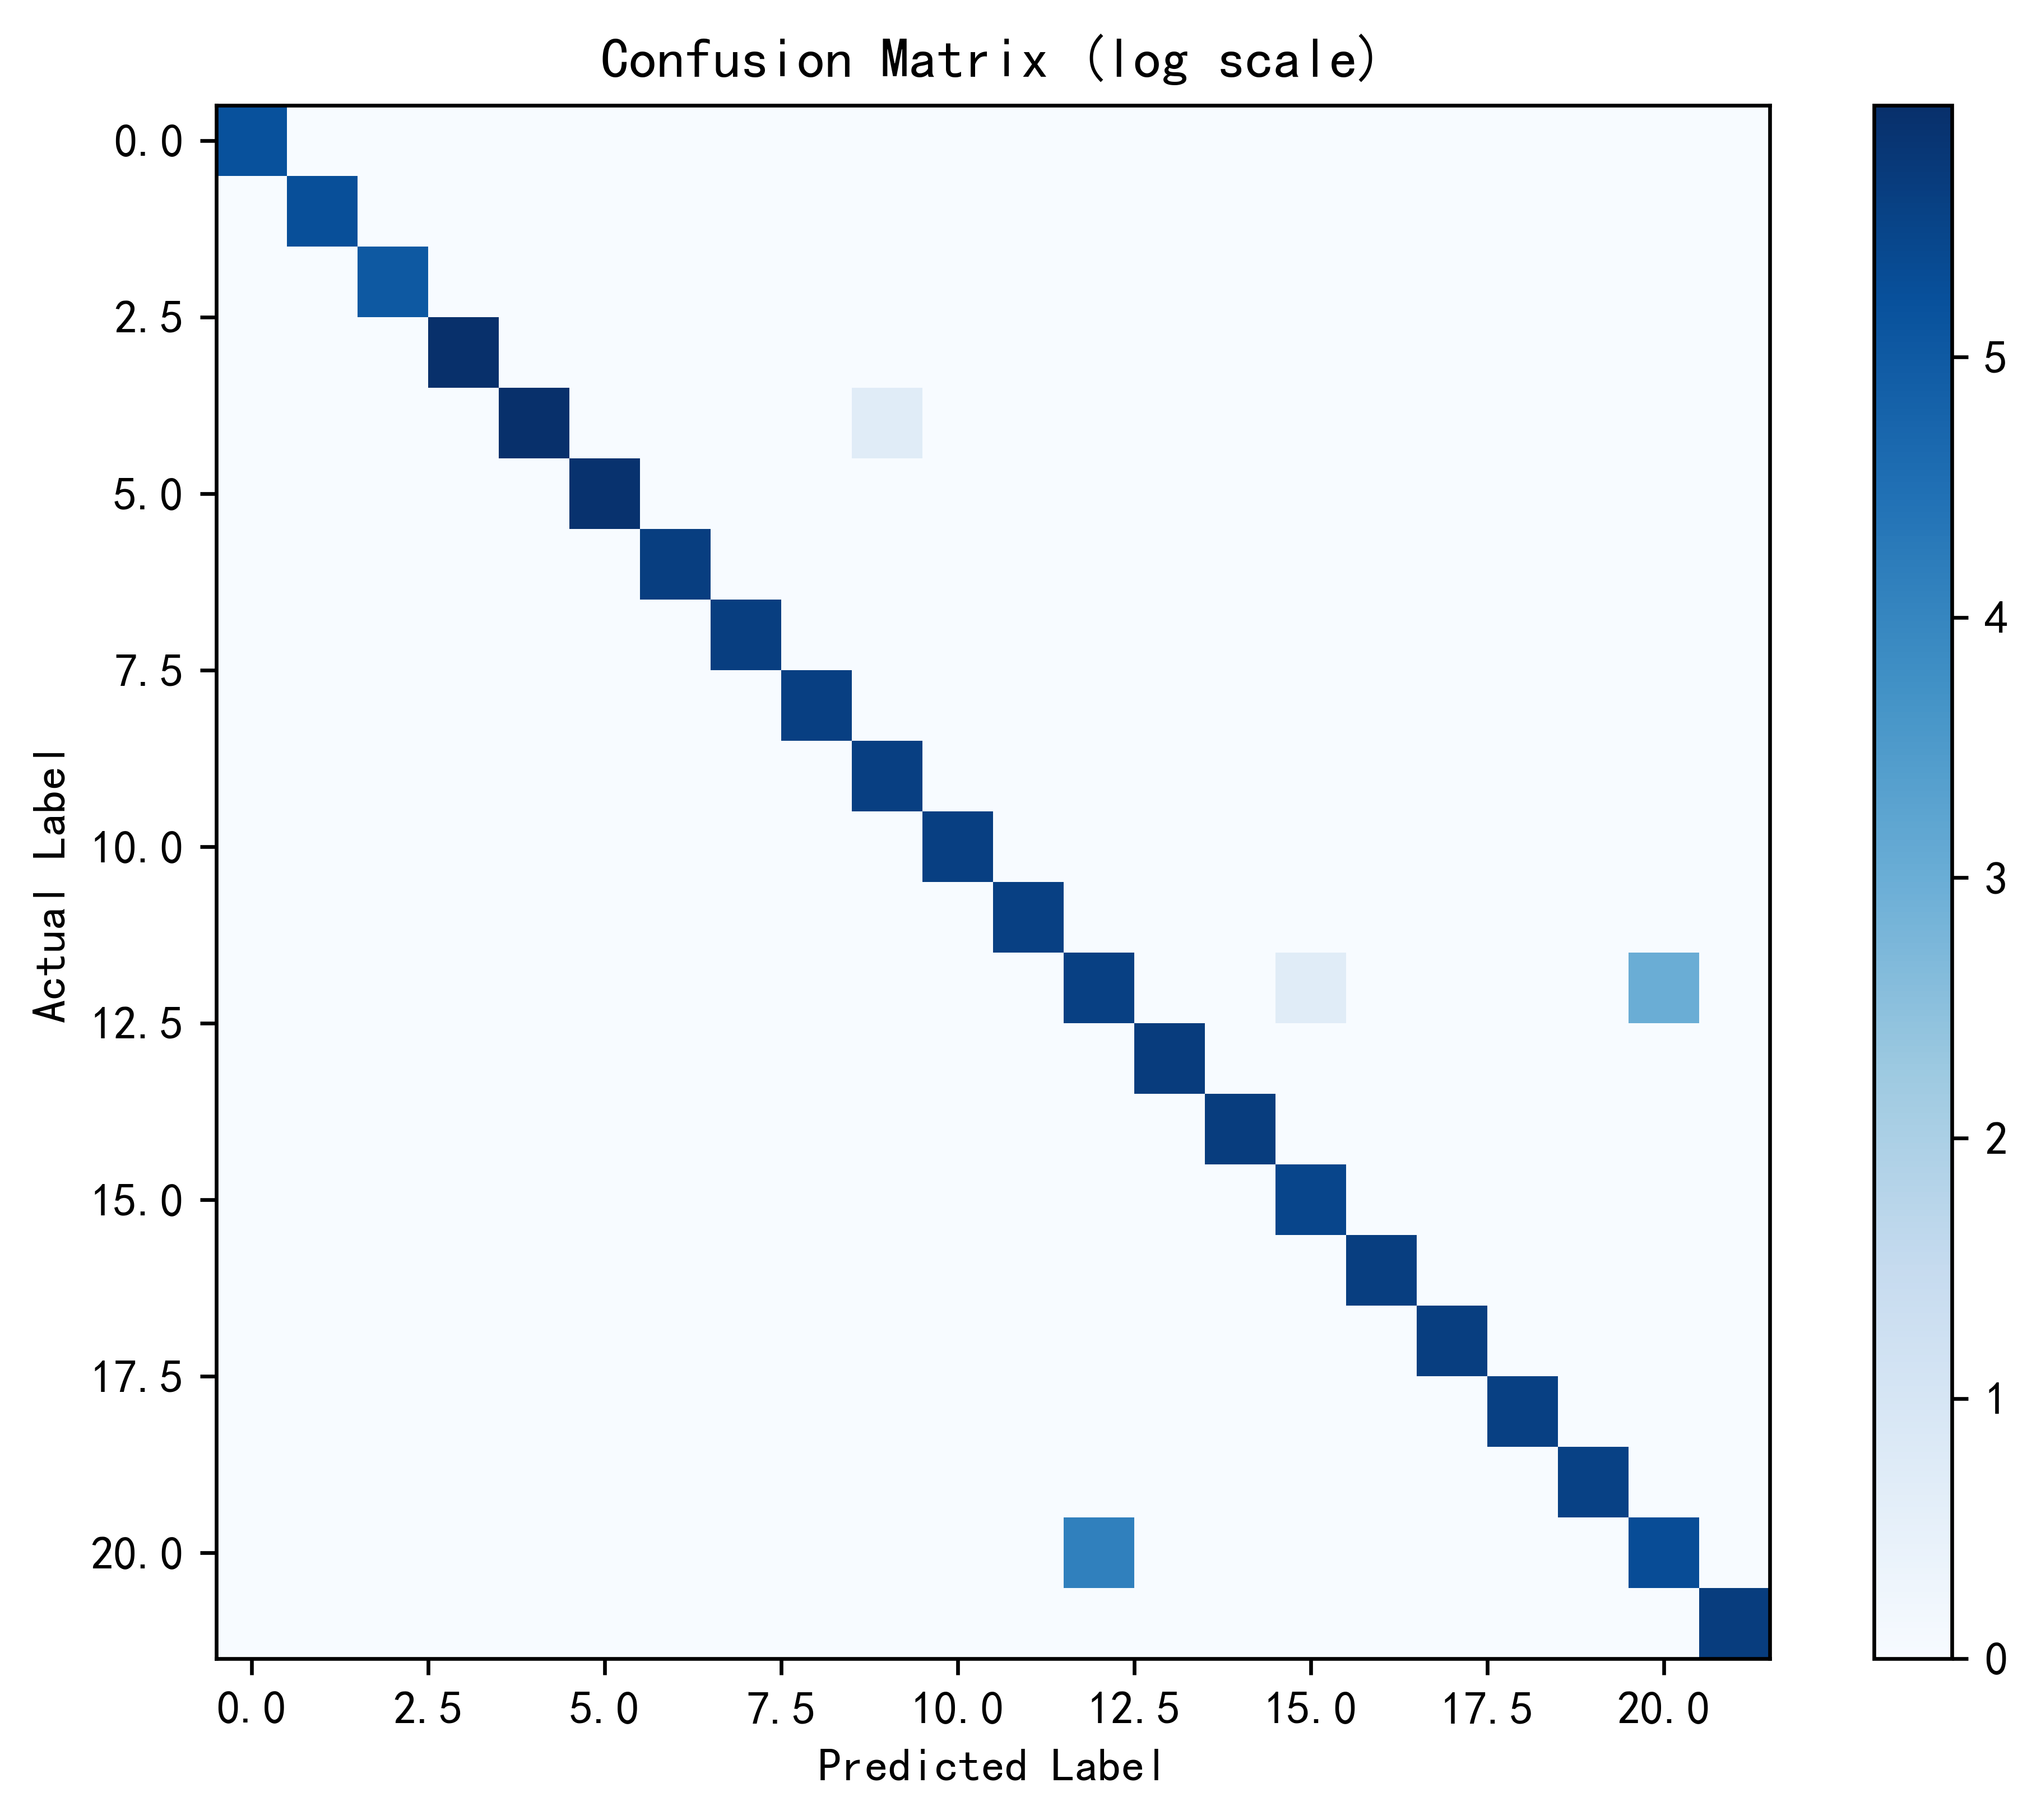

In [60]:
test_cnn.plot_confusion_matrix()